In [1]:
import pandas as pd

# Load data from CSV
data = pd.read_csv('Customer_Satisfaction.csv')
data.head()

,Date,CustomerID,Feedback,Rating
0,08/11/2022,73-7665415,No satisfaction,1
1,14/03/2022,80-3251166,No satisfaction,1
2,26/06/2023,31-2124169,Customer support was helpful.,4
3,02/10/2022,84-3522513,"Great service, very satisfied!",5
4,29/06/2022,98-8936074,Quality not as expected.,3


In [2]:
#Step 2: Data Cleaning

# Handling missing values
data.dropna(inplace=True)

# Ensure correct data types
data['Date'] = pd.to_datetime(data['Date'])
data['Rating'] = data['Rating'].astype(int)


In [3]:
#Step 3: Sentiment Analysis

from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Feedback'].apply(get_sentiment)


In [4]:
#Step 4: Data Analysis
# Aggregate data to get sentiment counts
sentiment_counts = data['Sentiment'].value_counts()

# Calculate average rating
average_rating = data['Rating'].mean()


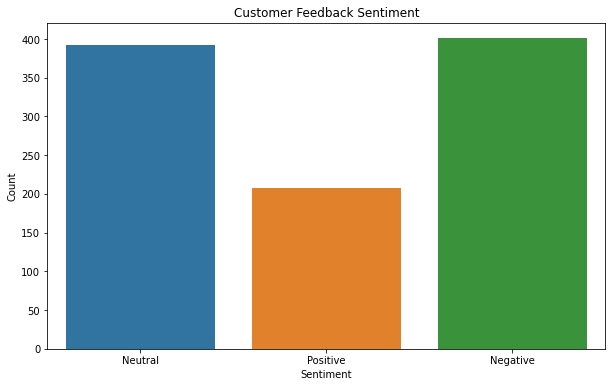

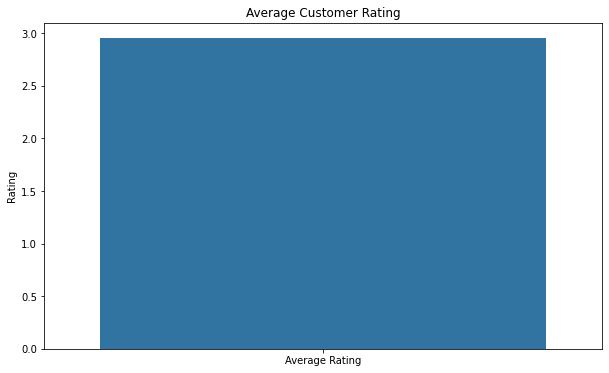

In [5]:
#Step 5: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Customer Feedback Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=['Average Rating'], y=[average_rating])
plt.title('Average Customer Rating')
plt.ylabel('Rating')
plt.show()


In [6]:
#Step 6: Customer Service Dashboard Using Plotly Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Graph(id='sentiment-graph'),
    dcc.Graph(id='rating-graph'),
])

# Update graphs based on data
@app.callback(
    [Output('sentiment-graph', 'figure'),
     Output('rating-graph', 'figure')],
    [Input('interval-component', 'n_intervals')]
)
def update_graphs(n):
    sentiment_fig = {
        'data': [
            {'x': sentiment_counts.index, 'y': sentiment_counts.values, 'type': 'bar', 'name': 'Sentiment'},
        ],
        'layout': {
            'title': 'Customer Feedback Sentiment'
        }
    }

    rating_fig = {
        'data': [
            {'x': ['Average Rating'], 'y': [average_rating], 'type': 'bar', 'name': 'Rating'},
        ],
        'layout': {
            'title': 'Average Customer Rating'
        }
    }

    return sentiment_fig, rating_fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


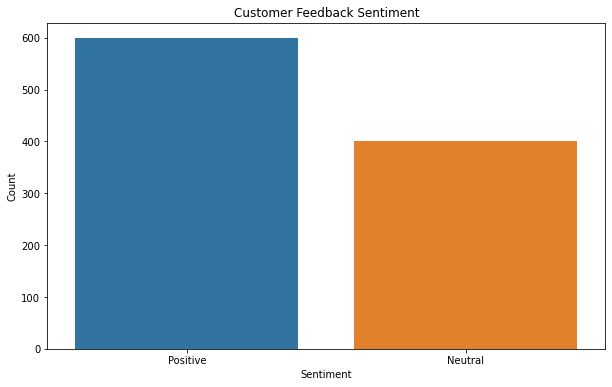

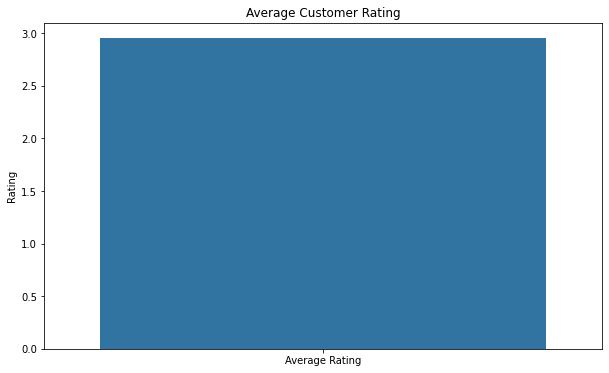

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load data from CSV
data = pd.read_csv('Customer_Satisfaction.csv')

# Handling missing values
data.dropna(inplace=True)

# Ensure correct data types
data['Date'] = pd.to_datetime(data['Date'])
data['Rating'] = data['Rating'].astype(int)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] > 0:
        return 'Positive'
    elif scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Feedback'].apply(get_sentiment)

# Aggregate data to get sentiment counts
sentiment_counts = data['Sentiment'].value_counts()

# Calculate average rating
average_rating = data['Rating'].mean()

# Plot sentiment counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Customer Feedback Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=['Average Rating'], y=[average_rating])
plt.title('Average Customer Rating')
plt.ylabel('Rating')
plt.show()
